In [124]:
%matplotlib inline

In [125]:
import pandas as pd

In [126]:
import numpy as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [127]:
import pandas as pd
X = pd.read_csv('/Users/annettechiu/Desktop/Health_indicators/RISKFACTORSANDACCESSTOCARE.csv')

In [128]:
X.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [129]:
X = X[X['No_Exercise'] > -100]

In [130]:
X = X[X['Diabetes'] > -100]

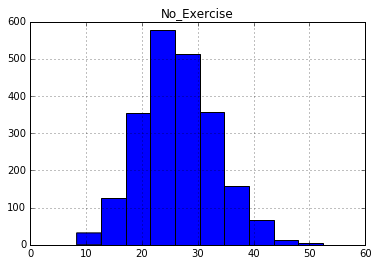

In [131]:
X.hist('No_Exercise');

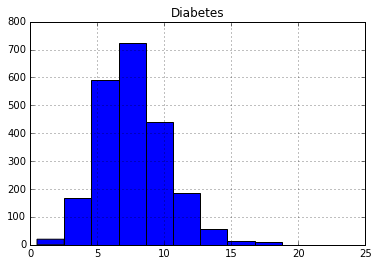

In [132]:
X.hist('Diabetes');

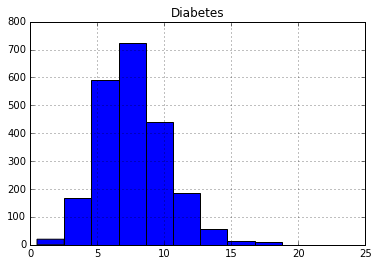

In [133]:
X.hist('Diabetes');

In [134]:
#remove any points with a missing y value
filtered_data =X[~np.isnan(X["No_Exercise"])]
filtered_data.head(3)
filtered_data.columns

Index([u'State_FIPS_Code', u'County_FIPS_Code', u'CHSI_County_Name',
       u'CHSI_State_Name', u'CHSI_State_Abbr', u'Strata_ID_Number',
       u'No_Exercise', u'CI_Min_No_Exercise', u'CI_Max_No_Exercise',
       u'Few_Fruit_Veg', u'CI_Min_Fruit_Veg', u'CI_Max_Fruit_Veg', u'Obesity',
       u'CI_Min_Obesity', u'CI_Max_Obesity', u'High_Blood_Pres',
       u'CI_Min_High_Blood_Pres', u'CI_Max_High_Blood_Pres', u'Smoker',
       u'CI_Min_Smoker', u'CI_Max_Smoker', u'Diabetes', u'CI_Min_Diabetes',
       u'CI_Max_Diabetes', u'Uninsured', u'Elderly_Medicare',
       u'Disabled_Medicare', u'Prim_Care_Phys_Rate', u'Dentist_Rate',
       u'Community_Health_Center_Ind', u'HPSA_Ind'],
      dtype='object')

In [135]:
filtered_data[['No_Exercise','Disabled_Medicare']].corr()

,No_Exercise,Disabled_Medicare
No_Exercise,1.000000,-0.058422
Disabled_Medicare,-0.058422,1.000000


In [136]:
filtered_data[['No_Exercise','High_Blood_Pres']].corr()

,No_Exercise,High_Blood_Pres
No_Exercise,1.000000,-0.171865
High_Blood_Pres,-0.171865,1.000000


In [137]:
filtered_data[['No_Exercise','Elderly_Medicare']].corr()

,No_Exercise,Elderly_Medicare
No_Exercise,1.000000,-0.101842
Elderly_Medicare,-0.101842,1.000000


In [138]:
filtered_data[['No_Exercise','Obesity']].corr()

,No_Exercise,Obesity
No_Exercise,1.000000,0.066733
Obesity,0.066733,1.000000


In [139]:
filtered_data[['No_Exercise','Diabetes']].corr()

,No_Exercise,Diabetes
No_Exercise,1.000000,0.484777
Diabetes,0.484777,1.000000


In [140]:
filtered_data[['No_Exercise','Prim_Care_Phys_Rate']].corr()

,No_Exercise,Prim_Care_Phys_Rate
No_Exercise,1.000000,-0.305625
Prim_Care_Phys_Rate,-0.305625,1.000000


In [147]:
npMatrix = np.matrix(filtered_data)
No_Exercise,Prim_Care_Phys_Rate = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(No_Exercise,Prim_Care_Phys_Rate) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print "formula: y = {0}x + {1}".format(m, b) # following slope intercept form 

formula: y = [ 0.45243906]x + [ 75.08070777]


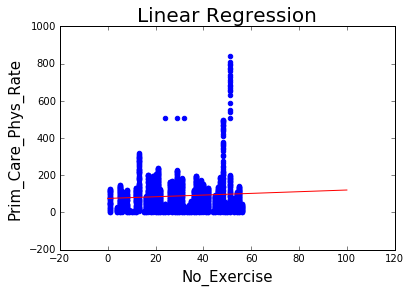

In [148]:
plt.scatter(No_Exercise,Prim_Care_Phys_Rate, color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.title('Linear Regression', fontsize = 20)
plt.xlabel('No_Exercise', fontsize = 15)
plt.ylabel('Prim_Care_Phys_Rate', fontsize = 15)

In [141]:
npMatrix = np.matrix(filtered_data)
No_Exercise, Diabetes = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(No_Exercise,Diabetes) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print "formula: y = {0}x + {1}".format(m, b) # following slope intercept form 

formula: y = [ 0.45243906]x + [ 75.08070777]


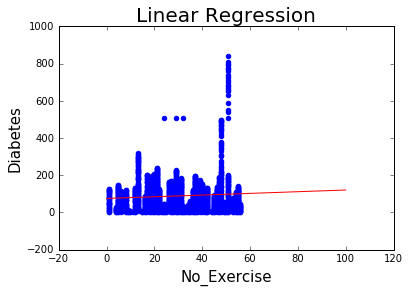

In [142]:
plt.scatter(No_Exercise,Diabetes, color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.title('Linear Regression', fontsize = 20)
plt.xlabel('No_Exercise', fontsize = 15)
plt.ylabel('Diabetes', fontsize = 15)